# Name Surfer

**Data Wrangling, Exploritory Data Analysis (EDA), and Data Visualization** using Python, Pandas, Numpy, Plotly

Based on NameSurfer assignment Stanford CS106A - Programming Methodology https://see.stanford.edu/materials/icspmcs106a/39-assignment-6-name-surfer.pdf

The data is from SSA https://www.ssa.gov/OACT/babynames/limits.html

Instead of using Java to create it, use Python and the graphics and dashboard tools.
It would be a fun enhancement to see a kind of heat map of a name on the continental us. For a given name, the color of the state would represent the popularity in that state. Can we see a migration of names? 

I would also like to see the appearance of names in states and how they change rank over time.

In [2]:
# Read the CSV files with 
# State abbreviation,Sex,Year, Name, Number of occurrences
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt

In [6]:
# Create an empty DataFrame since the files don't have headers
names_df = pd.DataFrame(columns=['State','Sex','Year','Name','NumOccurrences'])

files_path = Path('E:/UserLo/source/repos/learning/Name Surfer/NamesByState')
files_list = list (files_path.glob('*.txt'))
for f in files_list:
    with f.open("r") as f_h:
        state_df = pd.read_csv(f_h,header=None,names=['State','Sex','Year','Name','NumOccurrences'])
        names_df=pd.concat([names_df,state_df],axis=0, copy=False)


In [7]:
# No need to convert Year to datatime since it only has year. Just convert to int32
# names_df['Year'] = pd.to_datetime(names_df['Year'])

names_df = names_df.astype({'Year':'int32','NumOccurrences': 'int32'})

In [77]:
names_df.head()

,State,Sex,Year,Name,NumOccurrences
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [78]:
names_df.dtypes

State             object
Sex               object
Year               int32
Name              object
NumOccurrences     int32
dtype: object

In [65]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166799 entries, 0 to 137442
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   State           166799 non-null  object        
 1   Sex             166799 non-null  object        
 2   Year            166799 non-null  datetime64[ns]
 3   Name            166799 non-null  object        
 4   NumOccurrences  166799 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 7.0+ MB


In [162]:
def compute_rank(df,state,sex, year, name):
    """
    Given the state, sex, year and name determine the rank for the sex and overall rank.
    All the names with the same count will get the same rank. There are many names that have same count.
    """
    # Find number of occurrences for a given name
    name_row = df[(df['State']==state) &  (df['Sex']==sex) & (df['Year']==year) &  (df['Name']==name)]
    if not(name_row.empty): # Name exists for the given state, sex, year
        name_occurrence = name_row.reset_index().at[0,'NumOccurrences']
    
        # Create a DataFrame grouped by NumOccurrances.
        # Recall that many names will have the same number of occurrences.
        name_occurrences_df = df[(df['State']==state) &  (df['Sex']==sex) & (df['Year']==year)].groupby(by='NumOccurrences').count().reset_index()

        # The rank is computed by summing the number of occurrences greater than the currnet name occurrence and adding 1
        return name_occurrences_df[name_occurrences_df['NumOccurrences']>name_occurrence]['Name'].sum() + 1
    else: # Name does not exist for the given state, sex, year so return 0
        return 0
    


In [156]:
name_row = names_df[(names_df['State']=='AL') &  (names_df['Sex']=='M') & (names_df['Year']==1947) &  (names_df['Name']=='Zazoo')]

In [163]:
t= compute_rank(names_df,'AL','M',1947,'zazoo')
t

0

In [149]:
compute_rank(names_df,'AK','F',1910,'Margaret')

4

In [175]:
def compute_rank_df(df,state,sex, year_range, name):
    rank_list=[]
    for y in year_range:
        rank_list.append([name, y, compute_rank(df,state,sex,y,name)])
    
    return pd.DataFrame(rank_list,columns=['Name','Year','Rank'])

In [177]:
t= compute_rank_df(names_df,'AL','M',range(1960,2000,1),'James')

In [178]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    40 non-null     object
 1   Year    40 non-null     int64 
 2   Rank    40 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [669]:
%matplotlib inline

In [345]:
# Compute rank for top 1000 names for decade starting with 1910
distinct_names = names_df[names_df['Year'].isin(range(1910, 1920))]['Name'].unique()
name_occurrences_df = names_df[(names_df['State']=='AL') &  (names_df['Sex']=='M') & 
    (names_df['Year'].isin(range(1910, 1920))) & 
    (names_df['Name'].isin(distinct_names))].groupby(by=['Name']).sum()

In [350]:
name_occurrences_df = name_occurrences_df.sort_values('NumOccurrences', ascending=False).reset_index().iloc[0:1000]

In [353]:
name_occurrences_df.head()

,Name,Year,NumOccurrences
0,James,19145,12966
1,John,19145,9258
2,William,19145,8817
3,Robert,19145,6141
4,Willie,19145,5734


In [398]:
# Some names have same # of occurrences so they should all get same rank
# For instance 35 names have 6 total occurrences
count_of_occurrences_df = name_occurrences_df.groupby('NumOccurrences').count().sort_values('NumOccurrences',ascending=False).reset_index()
count_of_occurrences_df

,NumOccurrences,Name,Year
0,12966,1,1
1,9258,1,1
2,8817,1,1
3,6141,1,1
4,5734,1,1
...,...,...,...
264,9,1,1
265,8,4,4
266,7,10,10
267,6,35,35


In [341]:
names_df[names_df['Year'].isin(range(1910, 1920))]['Name'].unique()

array(['Mary', 'Annie', 'Anna', ..., 'Sims', 'Stewart', 'Westley'],
      dtype=object)

In [ ]:
import numpy as np

In [435]:
# There are many names that are both Male and Female.
male_df = names_df[names_df['Sex']=='M']['Name'].unique()
female_df = names_df[names_df['Sex']=='F']['Name'].unique()
j = np.intersect1d(male_df,female_df)
print (f'Number of unique Male names: {male_df.shape[0]}\n\
Percentage of male names common with female names: {j.shape[0]/male_df.shape[0]:.2%}\n\
Number of unique Female names: {female_df.shape[0]} \n\
Percentage of female names common with male names: {j.shape[0]/female_df.shape[0]:.2%}\n\
Number of names common to both: {j.shape[0]}')

Number of unique Male names: 2957
Percentage of male names common with female names: 19.82%
Number of unique Female names: 4525 
Percentage of female names common with male names: 12.95%
Number of names common to both: 586


Process of ranking a name based on number of occurrences within a group follows the same steps. 
1. Determine the group filters. The group filters are: 
- List of states. A single value can be provided as a string, i.e. 'AK' or ['AK'] will work. Default to all states
- List of sexes. A single value can be provided as a string, i.e. 'F' or ['F'] will work.Default to 'All'
- List or range of years. A single value can be provided as an int, i.e. 1910 or [1910] will work. Ex. [1910, 1911, 1912] or range(1910, 1913). Default 'All'
2. Get the unique names based on group filters
3. Sum the number of occurrences for each name
4. Count the number of names that have the same number of occurrences in the group. 
  This is needed because some names have same # of occurrences so they should all get same rank.
5. Rank all the names based on number of occurrences.
6. Look up rank of individual name in group, as needed.


In [4]:
def compute_name_occurences (df,states, sexes, years):
    """ df is the names DataFrame that has columns 
    ['State', 'Sex', 'Year', 'Name', 'NumOccurrences'], Year and NumOccurrences are int32
    states, sexes and years can be list, range, or set
    Note:
    Between 10% and 20% Male and Female names are the same so be aware when using both sexes
    """
    distinct_names = df[(df['State'].isin(states)) & (df['Sex'].isin(sexes)) & (df['Year'].isin(years))]['Name'].unique()

    name_occurrences_df = df[(df['State'].isin(states)) & (df['Sex'].isin(sexes)) & (df['Year'].isin(years)) & 
        (df['Name'].isin(distinct_names))].groupby(by=['Name']).sum()
    name_occurrences_df = name_occurrences_df.sort_values('NumOccurrences', ascending=False).reset_index()

    return name_occurrences_df[['Name','NumOccurrences']]

In [4]:
dn= compute_name_occurences(names_df,['AK'],{'F'},range(1910,1913))
dn

,Name,NumOccurrences
0,Mary,35
1,Helen,20
2,Margaret,20
3,Annie,18
4,Anna,17
5,Elsie,14
6,Ruth,13
7,Louise,7
8,Agnes,7
9,Jean,6


In [399]:
count_of_occurrences_df = dn.groupby('NumOccurrences').count().sort_values('NumOccurrences',ascending=False).reset_index()
count_of_occurrences_df

,NumOccurrences,Name
0,35,1
1,20,2
2,18,1
3,17,1
4,14,1
5,13,1
6,7,2
7,6,3
8,5,5


In [438]:
count_of_occurrences_df[count_of_occurrences_df['NumOccurrences']>18]['Name'].sum() + 1

4

In [450]:
all_df=compute_name_occurences (names_df,['AK','AL'], ['M','F'], range(1900,2100))

In [457]:
all_df.head()

,Name,NumOccurrences
0,James,166365
1,Mary,120663
2,William,108636
3,John,105246
4,Robert,88855


In [458]:
count_num_occ = all_df.groupby('NumOccurrences').count().sort_values('NumOccurrences',ascending=False).reset_index()
count_num_occ

,NumOccurrences,Name
0,166365,1
1,120663,1
2,108636,1
3,105246,1
4,88855,1
...,...,...
1612,9,20
1613,8,43
1614,7,126
1615,6,295


In [466]:
count_num_occ['Name'].sum()

6896

In [467]:
# Compute rank for a given NumOccurrences. Then match name to number of occurrences
# iterrows
# ['NumOccurrences','NumNames','Rank']
# NumNames is the number of Names that have number of occurrences equal to NumOccurrences
all_ranks = []
current_rank = 1
for idx, r in count_num_occ.iterrows():
    if idx != 0:
        current_rank += count_num_occ.loc[idx-1,'Name']

    all_ranks.append([r['NumOccurrences'], r['Name'],current_rank])
all_ranks_df = pd.DataFrame(all_ranks,columns=['NumOccurrences','NumNames','Rank'])

In [481]:
all_ranks_df.head()

,NumOccurrences,NumNames,Rank
0,166365,1,1
1,120663,1,2
2,108636,1,3
3,105246,1,4
4,88855,1,5


In [489]:
# merge performs a database 
# This join does the same thing:
#   nameRank_df = all_df.join(all_ranks_df.set_index('NumOccurrences'), on='NumOccurrences', how='inner')
nameRank_df = all_df.merge(all_ranks_df, on='NumOccurrences',how='inner')

In [491]:
nameRank_df.head()


,Name,NumOccurrences,NumNames,Rank
0,James,166365,1,1
1,Mary,120663,1,2
2,William,108636,1,3
3,John,105246,1,4
4,Robert,88855,1,5


In [478]:
nameRank_df.tail()

,Name,NumOccurrences,NumNames,Rank
6891,Caldonia,5,984,5913
6892,Porshia,5,984,5913
6893,Calen,5,984,5913
6894,Porche,5,984,5913
6895,Iyanla,5,984,5913


In [493]:
nameRank_df[nameRank_df['Name'].isin(['Lloyd','Merlin','Bettye'])]

,Name,NumOccurrences,NumNames,Rank
560,Bettye,2542,2,561
590,Lloyd,2332,1,591


In [503]:
def compute_rank_all_names_df(df,states='All', sexes = 'All', years='All'):
    """
    Given the state, sex, year determine the rank for all names in df.
    All the names with the same count will get the same rank. There are many names that have same count.
    df is the names DataFrame that has columns 
    ['State', 'Sex', 'Year', 'Name', 'NumOccurrences'], Year and NumOccurrences are int32
    """
    # Find number of occurrences for a given name
    if type(states) == str:
        if states == 'All':
            states = df['State'].unique()  # All the states in the input DataFrame
        else:
            states = [states] # Make individual state name a list

    if type(sexes) == str:
        if sexes == 'All':
            sexes = ['M','F']  # Both sexes
        else:
            sexes = [sexes] # Make individual sex a list

    if type(years) == str:
        if years == 'All': 
            years = df['Year'].unique() # All the years in the input DataFrame
        else:
            years = [years] # Make individual year a list


    name_occurrences_df = compute_name_occurences (df,states, sexes, years)
    count_num_occ = name_occurrences_df.groupby('NumOccurrences').count().sort_values('NumOccurrences',ascending=False).reset_index()

    # Compute rank for a given NumOccurrences. Then match name to number of occurrences
    # It makes sense to iterate using iterrows since the current_rank keeps accumulating
    # ['NumOccurrences','NumNames','Rank']
    # NumNames is the number of Names that have number of occurrences equal to NumOccurrences
    all_ranks_list = []
    current_rank = 1
    for idx, r in count_num_occ.iterrows():
        if idx != 0:
            current_rank += count_num_occ.loc[idx-1,'Name']
    
        all_ranks_list.append([r['NumOccurrences'], r['Name'],current_rank])
    all_ranks_df = pd.DataFrame(all_ranks_list,columns=['NumOccurrences','NumNames','Rank'])

    # merge performs a database 
    # This join does the same thing:
    #   nameRank_df = all_df.join(all_ranks_df.set_index('NumOccurrences'), on='NumOccurrences', how='inner')
    # Set Name as the index to make it easier to get the rank using .loc
    nameRank_df = name_occurrences_df.merge(all_ranks_df, on='NumOccurrences',how='inner').set_index('Name')

    return nameRank_df
    
    


In [454]:
compute_rank(names_df,'John')

4

In [504]:
rank_of_all_names_df = compute_rank_all_names_df(names_df)

In [505]:
rank_of_all_names_df.head()

,NumOccurrences,NumNames,Rank
Name,,,
James,166365,1,1
Mary,120663,1,2
William,108636,1,3
John,105246,1,4
Robert,88855,1,5


In [579]:
ss = rank_of_all_names_df.loc[['James','John'],'Rank']
ss

Name
James    1
John     4
Name: Rank, dtype: int64

In [612]:
merged_df = nr.merge(r1911,left_index=True, right_index=True,how='outer')  #,indicator=True)
merged_df.fillna(value=0, inplace=True)
merged_df.loc[['James','Mary','zazoo','Aaron']]
#merged_df.info()

,Rank1910,Rank1911
James,1.0,3.0
Mary,2.0,4.0
zazoo,0.0,6.0
Aaron,148.0,0.0


In [615]:
# Can merge with empty DataFrame
empty_df = pd.DataFrame()
merged_e_df = empty_df.merge(r1911,left_index=True, right_index=True,how='outer')  #,indicator=True)
merged_e_df.fillna(value=0, inplace=True)
merged_e_df.loc[['James','Mary','zazoo']]

,Rank1911
James,3
Mary,4
zazoo,6


In [ ]:
def compute_rank_of_name_list(rank_of_all_names_df, name_list):
    """
    Return a Series with Name as index and Rank as value.
    If name in name_list is not in rank_of_all_names_df, set rank to 0
    """
    missing_names_list = []
    clean_name_list
    rank_of_all_names_df.loc[clean_name_list,'Rank']

In order to plot names over time, need a dataframe with

Name   Year_Range_1 Year_Range_2 Year_Range_3 ...

By having Year_Range_1 you could rank, for example, for a decade. A single year of course would be a range of 1.

When a range is passed in, could add a boolean variable, accumulate_over_step_size, to indicate to accumulate the name occurrences over the years in the step size. Default to True. So range(1900, 2000,10) would accumulate over decades by default, otherwise it would it would take yearly samples every 10 years.


In [547]:
rr = range(1900, 2000, 10)
print(f'{rr.start=}  {rr.stop=}  {rr.step=}')

rr.start=1900  rr.stop=2000  rr.step=10


Names can come and go during different year ranges. When they disappear, the rank is set to NaN

By using merge method with ,how='outer',indicator=True, we can identify names that continue from year range to year range as well as those the appear or disappear.

Besides the years, still need to be able to select the group you are interested in so the filters for states and sexes needs to be there.

In [3]:
def compute_for_year_ranges(df,year_range,states='All', sexes = 'All'):
    """
    All the names with the same count will get the same rank. There are many names that have same count.
    df is the names DataFrame that has columns 
    ['State', 'Sex', 'Year', 'Name', 'NumOccurrences'], Year and NumOccurrences are int32

    year_range must be a range object 
    """
    # name_rank_year_ranges_df has index of all names. Columns = [Rank_<Year_range_1>,Rank_<Year_range_2>, Rank_<Year_range_3>, ...]
    name_rank_year_ranges_df = pd.DataFrame()   # Empty df to hold accumulated ranks

    if type(states) == str:
        if states == 'All':
            states = df['State'].unique()  # All the states in the input DataFrame
        else:
            states = [states] # Make individual state name a list

    if type(sexes) == str:
        if sexes == 'All':
            sexes = ['M','F']  # Both sexes
        else:
            sexes = [sexes] # Make individual sex a list

    # TODO: if year_range == 'All' then set range(1900,2020)

    for yr in year_range:
        # Each value of yr will be the start year of the sub_year_range.
        # yr+yr.step will be the stop year of the sub_year_range.
        # sub_year_range will have a step size of 1
        sub_year_range = range(yr,yr+year_range.step,1)

        # Find number of occurrences for a given name
        name_occurrences_df = compute_name_occurences (df,states, sexes, sub_year_range)
        count_num_occ = name_occurrences_df.groupby('NumOccurrences').count().sort_values('NumOccurrences',ascending=False).reset_index()

        # Compute rank for a given NumOccurrences. Then match name to number of occurrences
        # It makes sense to iterate using iterrows since the current_rank keeps accumulating
        # ['NumOccurrences','NumNames','Rank']
        # NumNames is the number of Names that have number of occurrences equal to NumOccurrences
        all_ranks_list = []
        current_rank = 1
        for idx, r in count_num_occ.iterrows():
            if idx != 0:
                current_rank += count_num_occ.loc[idx-1,'Name']

            all_ranks_list.append([r['NumOccurrences'], r['Name'],current_rank])
        all_ranks_df = pd.DataFrame(all_ranks_list,columns=['NumOccurrences','NumNames',f'{yr}'])

        # merge performs a database 
        # This join does the same thing:
        #   nameRank_df = all_df.join(all_ranks_df.set_index('NumOccurrences'), on='NumOccurrences', how='inner')
        # Set Name as the index to make it easier to get the rank using .loc
        # nameRank_df has index of all the names. Columns = [NumOccurrences,	NumNames,	Rank]
        nameRank_df = name_occurrences_df.merge(all_ranks_df, on='NumOccurrences',how='inner').set_index('Name')
        # Get just the Rank and merge it with name_rank_year_ranges_df
        merged_e_df = name_rank_year_ranges_df.merge(nameRank_df[[f'{yr}']],left_index=True, right_index=True,how='outer')
        # merged_e_df.fillna(value=0, inplace=True)
        # Don't replace NaN with 0. Plotly handles nan, by just skipping those values which is what we want.
        name_rank_year_ranges_df = merged_e_df
        

    return name_rank_year_ranges_df
    
    


In [8]:
result_df = compute_for_year_ranges(names_df,range(1910,2020,5))

In [74]:
result_df.head(10)

,1910,1912,1914,1916,1918
Name,,,,,
Aaron,430.0,299.0,291.0,297.0,289.0
Abbie,507.0,465.0,779.0,499.0,633.0
Abe,0.0,579.0,578.0,569.0,944.0
Abner,0.0,0.0,0.0,968.0,1095.0
Abraham,559.0,339.0,454.0,523.0,509.0
Acie,0.0,0.0,0.0,0.0,771.0
Ada,111.0,122.0,139.0,163.0,133.0
Adam,529.0,708.0,0.0,811.0,1095.0
Addie,113.0,141.0,134.0,140.0,178.0


In [665]:
# Top 10 names in 1910
result_df[result_df['1910'].isin(range(1,11))]

,1910,1912,1914,1916,1918
Name,,,,,
Annie,4.0,6.0,6.0,7.0,7.0
George,10.0,8.0,8.0,8.0,8.0
James,3.0,2.0,2.0,2.0,2.0
John,5.0,3.0,3.0,4.0,4.0
Mary,1.0,1.0,1.0,1.0,1.0
Mattie,8.0,10.0,13.0,18.0,18.0
Robert,7.0,7.0,7.0,6.0,6.0
Ruby,9.0,9.0,9.0,9.0,10.0
William,6.0,5.0,5.0,3.0,5.0


In [650]:
tr = result_df.loc[['John','William','Mary']].transpose().reset_index()

In [652]:
tr.rename(columns={'index':'Year'})

Name,Year,John,William,Mary
0,1910,5.0,6.0,1.0
1,1912,3.0,5.0,1.0
2,1914,3.0,5.0,1.0
3,1916,4.0,3.0,1.0
4,1918,4.0,5.0,1.0


In [8]:
john_series = result_df.loc['John']

In [658]:
john_series

1910    5.0
1912    3.0
1914    3.0
1916    4.0
1918    4.0
Name: John, dtype: float64

In [659]:
john_series.name

'John'

In [9]:
william_series = result_df.loc['William']

<Figure size 432x288 with 0 Axes>

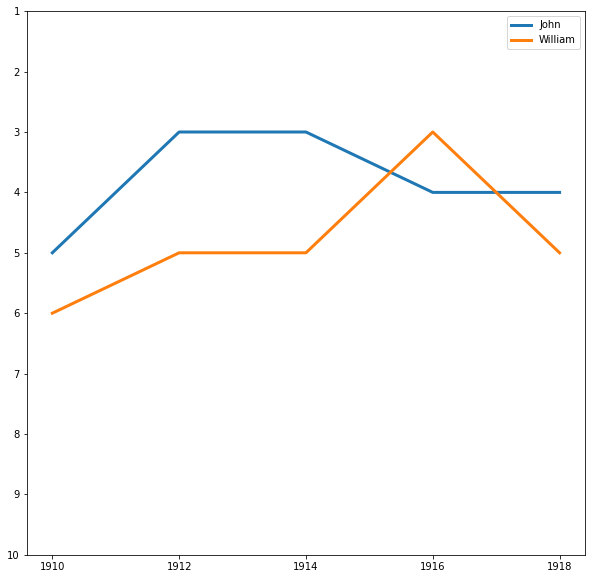

In [10]:
fig = plt.figure()
plt.figure(figsize=(10.0,10.0))
plt.plot(john_series,linewidth=3, label=john_series.name)
plt.plot(william_series,linewidth=3, label=william_series.name)
plt.legend()
plt.ylim(10,1)
plt.show()


<Figure size 432x288 with 0 Axes>

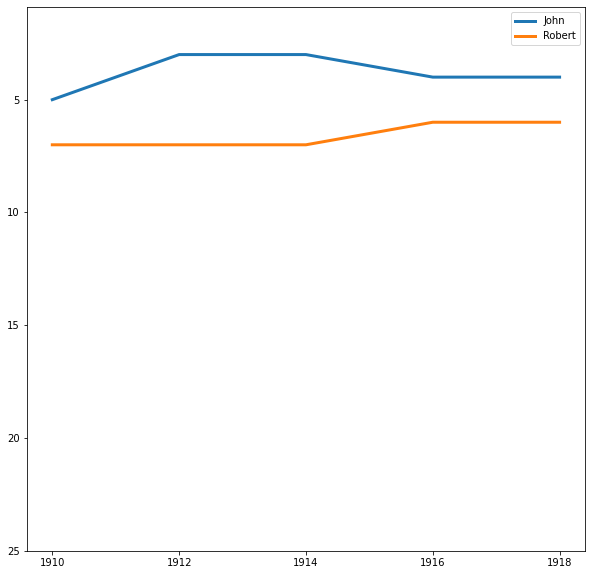

In [11]:
name_list = ['John','Robert']
fig = plt.figure()
plt.figure(figsize=(10.0,10.0))
selected_names_df = result_df.loc[name_list]
for i,rec in selected_names_df.iterrows():
    plt.plot(rec,linewidth=3, label=rec.name)

plt.legend()
plt.ylim(25,.9)
plt.show()

<Figure size 432x288 with 0 Axes>

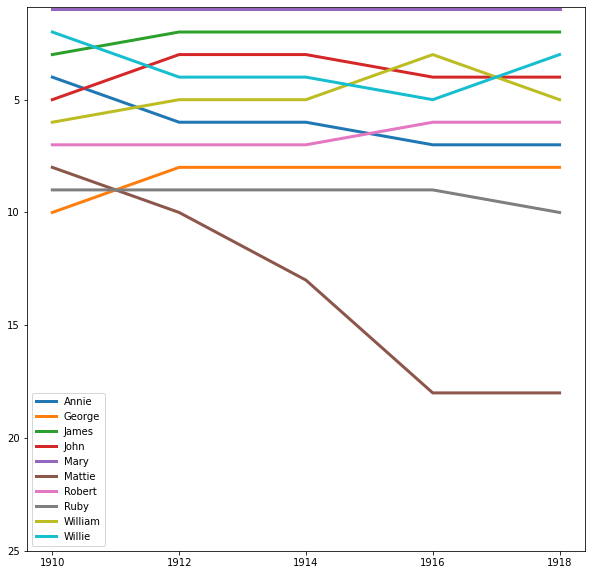

In [682]:
top10names = result_df[result_df['1910'].isin(range(1,11))]
fig = plt.figure()
plt.figure(figsize=(10.0,10.0))

for i,rec in top10names.iterrows():
    plt.plot(rec,linewidth=3, label=rec.name)

plt.legend()
plt.ylim(25,.9)
plt.show()
    

In [146]:
# Names with the greatest variance in rank over years
# Exclude any names that dissappear, i.e. rank = NaN
var_result_series = result_df[(result_df>=0).all(axis=1)].var(axis=1)
# Include any names that dissappear, i.e. rank = NaN
var_result_series_with_nan = result_df.var(axis=1)

In [156]:
var_result_top10_idx = var_result_series.sort_values(ascending=False).head(10).index


In [157]:
var_result_top10_idx.to_list()

['Gordon',
 'Marion',
 'Ben',
 'Dorothy',
 'Mack',
 'Clarence',
 'Leonard',
 'Howard',
 'Susan',
 'Joshua']

In [100]:
v_0_names = (var_result_series_with_nan.sort_values(ascending=False).head(10).index).to_list()
v_0_names

['Freya',
 'Abel',
 'Kannon',
 'Remi',
 'Kashton',
 'Amina',
 'Declan',
 'Ryker',
 'Brynlee',
 'Toccara']

In [735]:
# Add Ellen, Woodrow Wilson's wife's name
top_10_var_df = pd.concat([result_df.loc[var_result_top10_idx,:],result_df.loc[['Ellen'],:]],axis=0)
top_10_var_df

,1910,1912,1914,1916,1918
Name,,,,,
Corinne,559.0,513.0,578.0,619.0,1095.0
Maud,395.0,579.0,798.0,646.0,1016.0
Tressie,467.0,479.0,868.0,919.0,542.0
Nona,483.0,399.0,662.0,664.0,944.0
Woodrow,529.0,47.0,88.0,77.0,70.0
Rosia,317.0,496.0,478.0,871.0,606.0
Cleve,529.0,708.0,578.0,871.0,1016.0
Dolly,559.0,479.0,949.0,840.0,579.0
Lura,412.0,449.0,798.0,499.0,824.0


<Figure size 432x288 with 0 Axes>

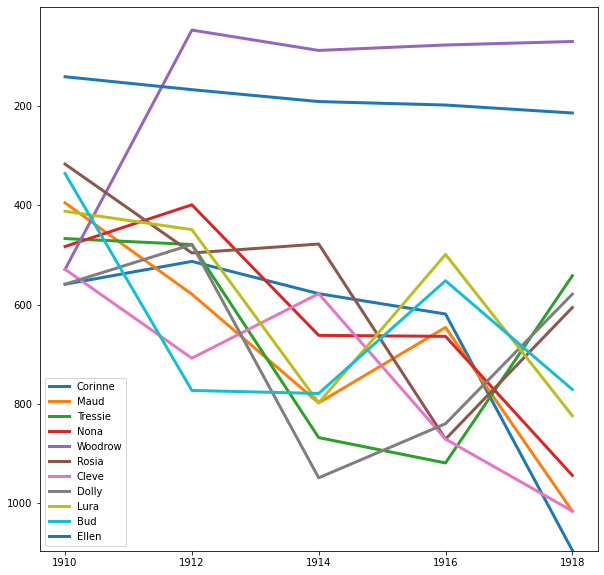

In [736]:
# top_10_var_df.max().max() finds max value in entire DataFrame
fig = plt.figure()
plt.figure(figsize=(10.0,10.0))

for i,rec in top_10_var_df.iterrows():
    plt.plot(rec,linewidth=3, label=rec.name)

plt.legend()
plt.ylim(top_10_var_df.max().max() + 1,.9)
plt.show()

Interesting to see that the name Woodrow greatly increased in popularity when he became president in 1913 https://en.wikipedia.org/wiki/Woodrow_Wilson

Wilson's wife Ellen's name did not change much in popularity 

A fun plot would be to see how the names of the presidents and first ladies corresponds with popularity. Oldest name data is only back to 1910, but still check older names to see if they have lingering popularity.

In [36]:
import plotly.express as px
import plotly.graph_objects as go

In [90]:
name_list = ['John','Robert','William']
selected_names_df = result_df.loc[name_list]
selected_names_df

,1910,1912,1914,1916,1918
Name,,,,,
John,5.0,3.0,3.0,4.0,4.0
Robert,7.0,7.0,7.0,6.0,6.0
William,6.0,5.0,5.0,3.0,5.0


In [91]:
selected_names_df.T

Name,John,Robert,William
1910,5.0,7.0,6.0
1912,3.0,7.0,5.0
1914,3.0,7.0,5.0
1916,4.0,6.0,3.0
1918,4.0,6.0,5.0


In [37]:
# Use plotly express
# Using plotly to plot dataframe in the wide data format: https://plotly.com/python/wide-form/?msclkid=7d97c0efcff811ec9b064ba538d4e0f1
# Plotly Express performed an internal Pandas melt() operation to convert the wide-form data into long-form for plotting
# selected_names_df is not exactly in the wide format, so plot the transpose
name_list = ['John','Robert','William','Bettye', 'Minnie','zazoo']
set_r = set(result_df.index)
n_set = set(name_list)
clean = list(n_set & set_r)
selected_names_df = result_df.loc[clean]
s_t = selected_names_df.T
fig = px.line(s_t,x=s_t.index, y=s_t.columns) 
fig.update_traces(mode='lines+markers')
fig.update_yaxes(range=(s_t.max().max() + 1,.9))
fig.update_xaxes(title_text="Years")
fig.update_yaxes(title_text="Rank")
fig.show()
missing = n_set - set_r
if len(missing) != 0:
    print (f'Some names are missing from data: {missing}')

Some names are missing from data: {'zazoo'}


In [134]:
# Use set intersection and difference to get list of names that are present in the data and those that are missing
set_r = set(result_df.index)
n_list = ['John','Robert','William','Bettye', 'Minnie','zazoo']
n_set = set(n_list)
clean = n_set & set_r
missing = n_set - set_r
print (f'{clean=} , {missing=}')

clean={'Minnie', 'William', 'Robert', 'Bettye', 'John'} , missing={'zazoo'}


In [199]:
series_1915 = result_df.loc[:,'1915']
start_set=set(series_1915[series_1915>0].index)

series_2020 = result_df.loc[:,'2015']
end_set=set(series_2020[series_2020>0].index)
new_list = list(end_set - start_set)
result_df_new = result_df.loc[new_list].sort_values(by='2015',ascending=True).head(20) # Sort ascending since lower values means higher rank
#new_list
#result_df_new


In [38]:
def plot_name_rank(result_df,name_list):
    set_r = set(result_df.index)
    n_set = set(name_list)
    clean = list(n_set & set_r)
    selected_names_df = result_df.loc[clean]
    s_t = selected_names_df.T
    fig = px.line(s_t,x=s_t.index, y=s_t.columns) 
    fig.update_traces(mode='lines+markers')
    fig.update_yaxes(range=(s_t.max().max() + 1,.9))
    fig.update_xaxes(title_text="Years")
    fig.update_yaxes(title_text="Rank")
    fig.show()
    missing = n_set - set_r
    if len(missing) != 0:
        print (f'Some names are missing from data: {missing}')

In [9]:
result_df.head()

,1910,1915,1920,1925,1930,1935,1940,1945,1950,1955,...,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015
Name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9929.0,NaN
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10859.0
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9120.0,12135.0,NaN
Aadarsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12280.0,NaN,10859.0
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1106.0,1697.0,2186.0


In [12]:
all_names_list = list(result_df.index)
print (f'Total number of distinct names {len(all_names_list)}')

Total number of distinct names 31865


In [30]:
all_names_df = result_df.index.to_frame(index=False)


In [31]:
all_names_df['Length'] = all_names_df.applymap(lambda x:len(x))
top_10_length_df = all_names_df.sort_values(by='Length',ascending=False).head(10)
top_10_length_df

,Name,Length
25366,Ryanchristopher,15
14511,Johnchristopher,15
19919,Mariadelosangel,15
10310,Franciscojavier,15
22980,Oluwatimilehin,14
5869,Christinamarie,14
19927,Mariaguadalupe,14
21007,Michaelanthony,14
21018,Michaelvincent,14
1068,Alexanderjames,14


In [39]:
top_10_names_length_list = top_10_length_df['Name'].to_list()

In [40]:
plot_name_rank(result_df,top_10_names_length_list)